# PERCEPTRON

##### LOAD THE DATA

In [1]:
import numpy as np

# each row contains Sepal length in cm, Sepal width in nm and type (0|1)
# 0: Iris-setosa | 1: Iris-versicolor
data = np.loadtxt('iris-data.csv', delimiter=',')
data

array([[ 5.1,  3.5,  0. ],
       [ 4.9,  3. ,  0. ],
       [ 4.7,  3.2,  0. ],
       [ 4.9,  3. ,  0. ],
       [ 4.6,  3.1,  0. ],
       [ 4.6,  3.1,  0. ],
       [ 4.7,  3.2,  0. ],
       [ 4.6,  3.4,  0. ],
       [ 5.4,  3.9,  0. ],
       [ 5. ,  3.6,  0. ],
       [ 4.7,  3.2,  0. ],
       [ 4.7,  3.2,  0. ],
       [ 5.1,  3.5,  0. ],
       [ 4.4,  2.9,  0. ],
       [ 5. ,  3.4,  0. ],
       [ 5.4,  3.7,  0. ],
       [ 4.8,  3.4,  0. ],
       [ 4.8,  3. ,  0. ],
       [ 5.8,  4. ,  0. ],
       [ 4.8,  3.4,  0. ],
       [ 4.4,  2.9,  0. ],
       [ 5.1,  3.5,  0. ],
       [ 5.8,  4. ,  0. ],
       [ 4.4,  2.9,  0. ],
       [ 5.5,  2.3,  1. ],
       [ 5.4,  3.9,  0. ],
       [ 5.7,  3.8,  0. ],
       [ 5.4,  3.9,  0. ],
       [ 5.4,  3.9,  0. ],
       [ 5.4,  3.9,  0. ],
       [ 5.7,  4.4,  0. ],
       [ 4.8,  3.4,  0. ],
       [ 5.7,  2.8,  1. ],
       [ 4.7,  3.2,  0. ],
       [ 5.4,  3.7,  0. ],
       [ 4.9,  3.1,  0. ],
       [ 5.2,  2.7,  1. ],
 

##### VISUALIZE THE DATA

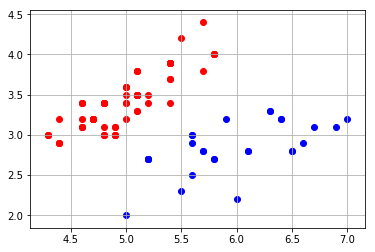

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.grid()

for i in range(len(data)) :
    point = data[i]
    if point[2] == 0 :
        color = 'r'  # setosas will appear in blue
    else:
        color = 'b'  # versicolor will appear in red
    
    plt.scatter(point[0], point[1], c=color);

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(url= 'https://farm9.staticflickr.com/8383/8675226902_e72273713f_k.jpg', width=400, height=400)

##### DEFINE TRAINING AND TESTING SETS

In [4]:
# split data into training and testing sets
train_data = data[:70]   # 70%
test_data = data[70:]    # 30%

##### DEFINE ACTIVATION FUNCTION AND ITS DERIVATIVE

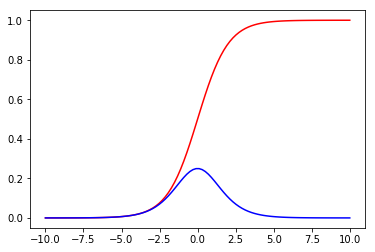

In [5]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

lin = np.linspace(-10, 10, 100)
plt.plot(lin, sigmoid(lin), c='r')
plt.plot(lin, sigmoid_p(lin), c='b');

##### TRAIN THE MODEL

In [6]:
# deploy a progress bar
try:
    from tqdm import tqdm_notebook as tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x

cost_list = []
learning_rate = 0.2
n_epochs = 20

# iniciate the weights and the bias with random numbers
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for ep in tqdm(range(n_epochs)):
    cost_epoch = 0
    
    for i in range(len(train_data)):
        # choose a single item
        point = train_data[i]

        z = point[0] * w1 + point[1] * w2 + b
        prediction = sigmoid(z)

        # cost function
        target = point[2]
        cost = np.square(prediction - target)
        cost_epoch += cost/len(train_data)

        #derivative of the cost function
        dcost_prediction = 2 * (prediction -target)
        dprediction_dz = sigmoid_p(z)

        # the derivatives of the weights is the inputs values 
        # the derivative of the Bias is 1
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1

        # the slope of the cost function
        dcost_dz = dcost_prediction * dprediction_dz

        # the slope of the weights & bias
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db

        # update the weights and bias
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    
    # store the change on the cost through every epoch
    cost_list.append(cost_epoch)

    # print evolution of the regression model
    print('Epoch: {}\tCost: {:06.5f}\tRegression: {:06.5f}(X1) + {:06.5f}(X2) + {:06.5f}'.format(ep,
                                                                                                 cost_epoch,
                                                                                                 w1,
                                                                                                 w2,
                                                                                                 b))

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

Epoch: 0	Cost: 0.39647	Regression: 0.19837(X1) + -0.92720(X2) + -0.23121
Epoch: 1	Cost: 0.15868	Regression: 0.56972(X1) + -1.49644(X2) + -0.29568
Epoch: 2	Cost: 0.11605	Regression: 0.89938(X1) + -1.99963(X2) + -0.34637
Epoch: 3	Cost: 0.08464	Regression: 1.17828(X1) + -2.40236(X2) + -0.38227
Epoch: 4	Cost: 0.06446	Regression: 1.39350(X1) + -2.73119(X2) + -0.41347
Epoch: 5	Cost: 0.05191	Regression: 1.56196(X1) + -3.00182(X2) + -0.44137
Epoch: 6	Cost: 0.04383	Regression: 1.70139(X1) + -3.22866(X2) + -0.46623
Epoch: 7	Cost: 0.03822	Regression: 1.82166(X1) + -3.42372(X2) + -0.48863
Epoch: 8	Cost: 0.03400	Regression: 1.92856(X1) + -3.59481(X2) + -0.50899
Epoch: 9	Cost: 0.03063	Regression: 2.02554(X1) + -3.74702(X2) + -0.52761
Epoch: 10	Cost: 0.02783	Regression: 2.11464(X1) + -3.88395(X2) + -0.54476
Epoch: 11	Cost: 0.02545	Regression: 2.19712(X1) + -4.00831(X2) + -0.56069
Epoch: 12	Cost: 0.02341	Regression: 2.27380(X1) + -4.12222(X2) + -0.57560
Epoch: 13	Cost: 0.02164	Regression: 2.34528(X1) 

##### VISUALIZE MODEL IMPROVEMENT

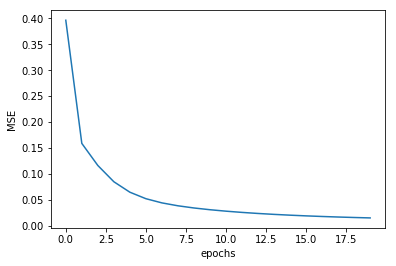

In [7]:
plt.plot(cost_list)
plt.xlabel('epochs')
plt.ylabel('MSE');

##### MAKE PREDICTIONS

In [8]:
def predictor(feature1, feature2):
    logit = (feature1 * w1) + (feature2 * w2) + b
    prediction = sigmoid(logit)
    return prediction

for i in range(len(test_data)) :
    point = test_data[i]
    prediction = predictor(point[0], point[1])
    prediction  = int(round(prediction))  # round the result to the nearest integer
    
    print('Input: {}, {}\t\tRealValue vs Prediction: {} - {}'.format(point[0], point[1], prediction, int(point[2])))

Input: 5.6, 3.0		RealValue vs Prediction: 1 - 1
Input: 5.1, 3.3		RealValue vs Prediction: 0 - 0
Input: 5.9, 3.2		RealValue vs Prediction: 1 - 1
Input: 5.1, 3.8		RealValue vs Prediction: 0 - 0
Input: 4.3, 3.0		RealValue vs Prediction: 0 - 0
Input: 5.1, 3.8		RealValue vs Prediction: 0 - 0
Input: 5.2, 2.7		RealValue vs Prediction: 1 - 1
Input: 5.0, 3.2		RealValue vs Prediction: 0 - 0
Input: 5.2, 3.5		RealValue vs Prediction: 0 - 0
Input: 5.0, 3.6		RealValue vs Prediction: 0 - 0
Input: 5.6, 3.0		RealValue vs Prediction: 1 - 1
Input: 5.5, 4.2		RealValue vs Prediction: 0 - 0
Input: 5.0, 3.5		RealValue vs Prediction: 0 - 0
Input: 6.1, 2.8		RealValue vs Prediction: 1 - 1
Input: 6.5, 2.8		RealValue vs Prediction: 1 - 1
Input: 5.1, 3.5		RealValue vs Prediction: 0 - 0
Input: 6.0, 2.2		RealValue vs Prediction: 1 - 1
Input: 5.2, 3.4		RealValue vs Prediction: 0 - 0
Input: 4.9, 3.1		RealValue vs Prediction: 0 - 0
Input: 4.4, 3.2		RealValue vs Prediction: 0 - 0
Input: 6.3, 3.3		RealValue vs Prediction